In [3]:
data.shape

(1000, 9)

### Check Data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 9 columns):

 #   Column            Non-Null Count  Dtype 

---  ------            --------------  ----- 

 0   Transaction ID    1000 non-null   int64 

 1   Date              1000 non-null   object

 2   Customer ID       1000 non-null   object

 3   Gender            1000 non-null   object

 4   Age               1000 non-null   int64 

 5   Product Category  1000 non-null   object

 6   Quantity          1000 non-null   int64 

 7   Price per Unit    1000 non-null   int64 

 8   Total Amount      1000 non-null   int64 

dtypes: int64(5), object(4)

memory usage: 70.4+ KB


### Mean

In [6]:
data.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


### Median

In [7]:
#numerical columns
num_col = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

median = data[num_col].median()

print("Median Of All Numeric Columns:\n",median)

Median Of All Numeric Columns:

 Age                42.0

Quantity            3.0

Price per Unit     50.0

Total Amount      135.0

dtype: float64


### Mode 

In [8]:
mode = data.mode().iloc[0]
mode

Date                5/16/2023
Customer ID           CUST001
Gender                 Female
Age                      43.0
Product Category     Clothing
Quantity                  4.0
Price per Unit           50.0
Total Amount             50.0
Name: 0, dtype: object

### Check Null Values

In [9]:
data.isnull().sum()

Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Time Series Analysis - Monthly Sales Trend

In [10]:
#Convert Date column datatype to dateime format
data['Date'] = pd.to_datetime(data['Date'])

#Set Date column to index
data.set_index('Date', inplace = True)

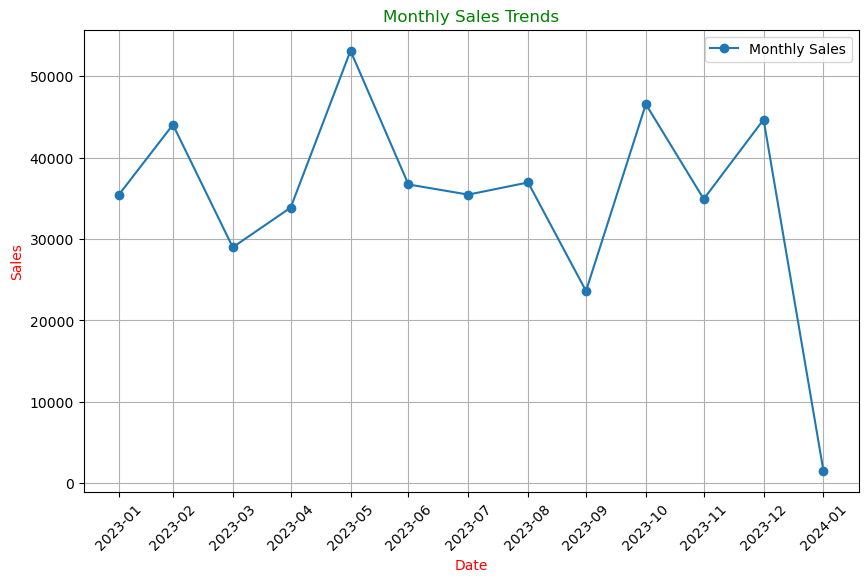

In [11]:
#Resampe data by month to analyze monthly trends
all_months = pd.date_range(start = "2023-01-01", end = "2024-01-31", freq='M')
mon_sale = data['Total Amount'].resample('M').sum().reindex(all_months, fill_value=0)

#Plotting
plt.figure(figsize=(10,6))
plt.plot(mon_sale, marker = 'o', label='Monthly Sales')
plt.title('Monthly Sales Trends', color='green')
plt.xlabel('Date', color='red')
plt.ylabel('Sales', color='red')

# Setting x-axis ticks to show each month
plt.xticks(pd.date_range(start='2023-01-01', end='2024-01-31', freq='M'), 
           labels=[date.strftime('%Y-%m') for date in pd.date_range(start='2023-01-01', end='2024-01-31', freq='M')],
           rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Time Series Analysis - Monthly Sales Wth 3 Month Average Trend

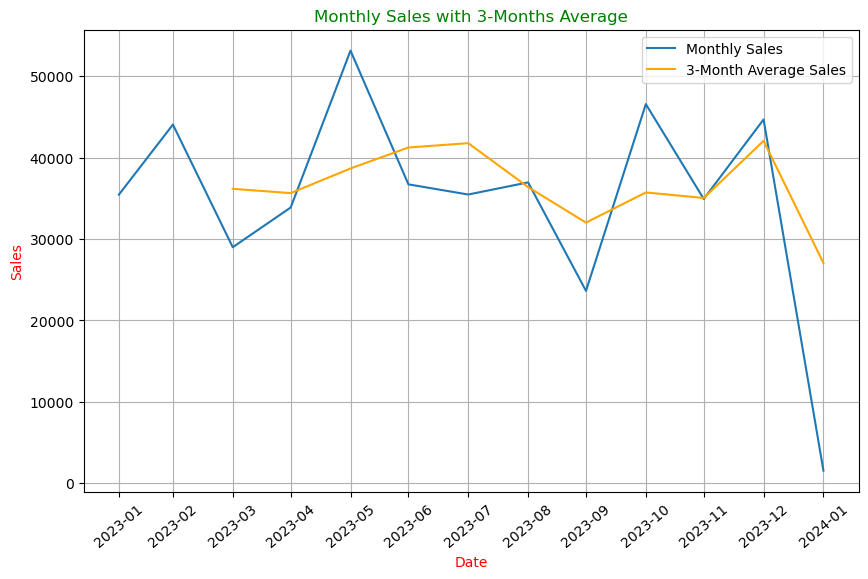

In [12]:
Three_month_avg = mon_sale.rolling(window=3).mean()

plt.figure(figsize=(10,6))
plt.plot(mon_sale, label='Monthly Sales')
plt.plot(Three_month_avg, label='3-Month Average Sales', color='orange')
plt.title('Monthly Sales with 3-Months Average', color='green')
plt.xlabel('Date', color='red')
plt.ylabel('Sales', color='red')

# Setting x-axis ticks to show each month
plt.xticks(pd.date_range(start='2023-01-01', end='2024-01-31', freq='M'), 
           labels=[date.strftime('%Y-%m') for date in pd.date_range(start='2023-01-01', end='2024-01-31', freq='M')],
           rotation=40)
plt.legend()
plt.grid(True)
plt.show()

### Customer & Product Analysis

#### Customer Analaysis

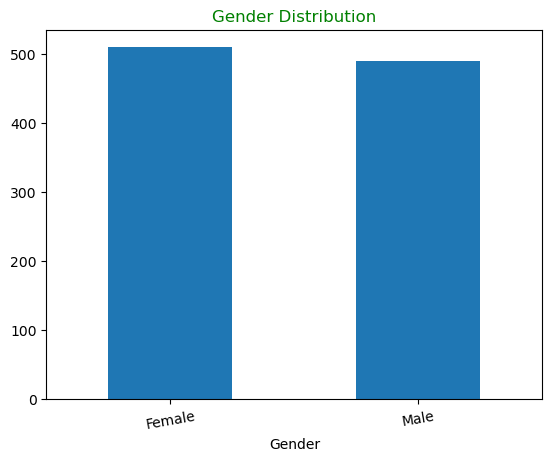

In [13]:
gender_dist = data['Gender'].value_counts()
gender_dist.plot(kind='bar')
plt.title('Gender Distribution', color='green')
plt.xticks(rotation=10)
plt.show()

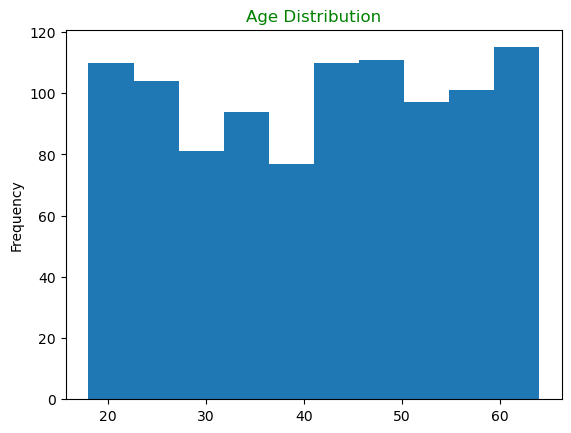

In [14]:
data['Age'].plot(kind='hist')
plt.title('Age Distribution', color='green')
plt.show()

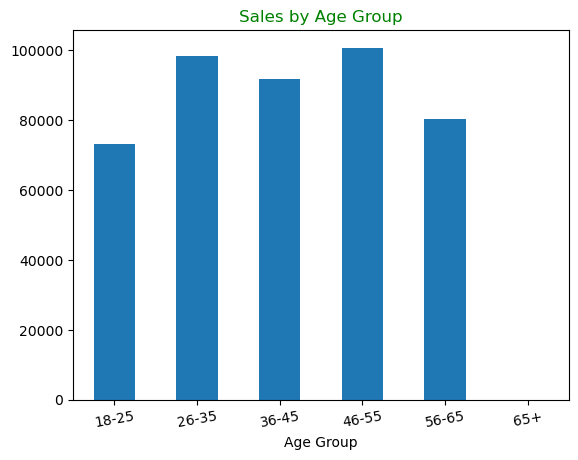

In [15]:
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_sales = data.groupby('Age Group')['Total Amount'].sum()
age_sales.plot(kind='bar')
plt.title('Sales by Age Group', color='green')
plt.xticks(rotation=10)
plt.show()

#### Product Analysis

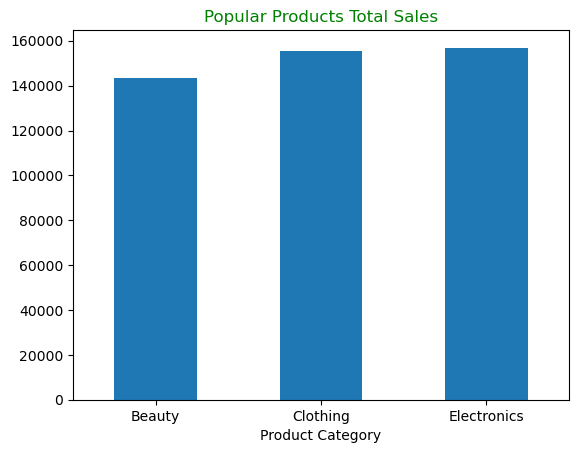

In [16]:
pop_product = data.groupby('Product Category')['Total Amount'].sum()
pop_product.plot(kind='bar')
plt.title('Popular Products Total Sales', color='green')
plt.xticks(rotation=0)
plt.show()

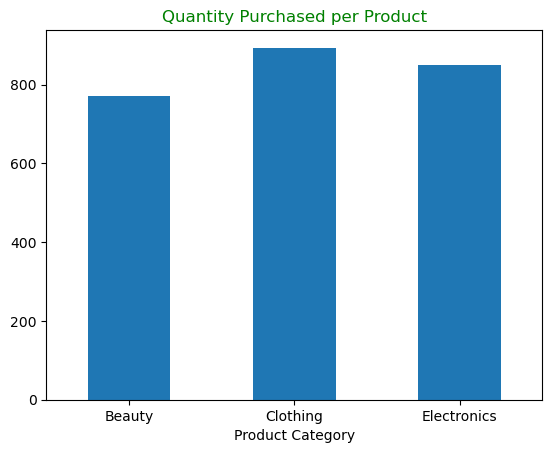

In [17]:
quan_per_prod = data.groupby('Product Category')['Quantity'].sum()
quan_per_prod.plot(kind='bar')
plt.title('Quantity Purchased per Product', color='green')
plt.xticks(rotation=0)
plt.show()

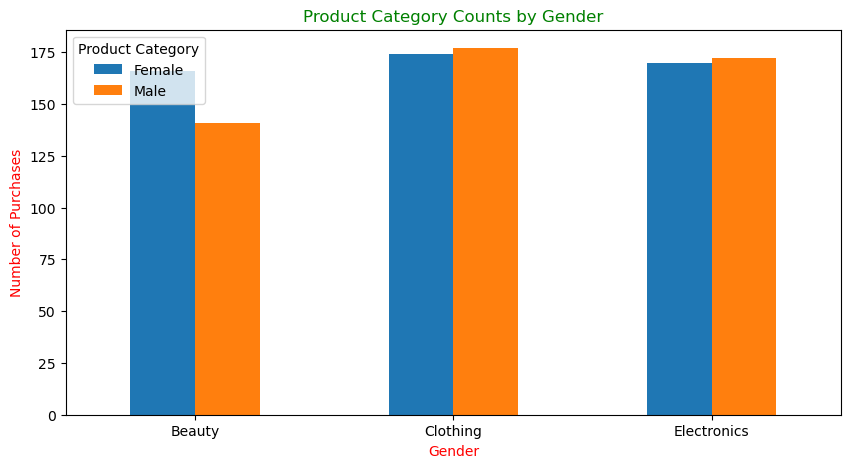

In [18]:
gender_per_prod = data.groupby(['Product Category','Gender']).size().unstack()
gender_per_prod
gender_per_prod.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=0)
plt.title('Product Category Counts by Gender', color='green')
plt.xlabel("Gender", color='red')
plt.ylabel("Number of Purchases", color='red')
plt.legend(title="Product Category")
plt.show()

### Heatmap

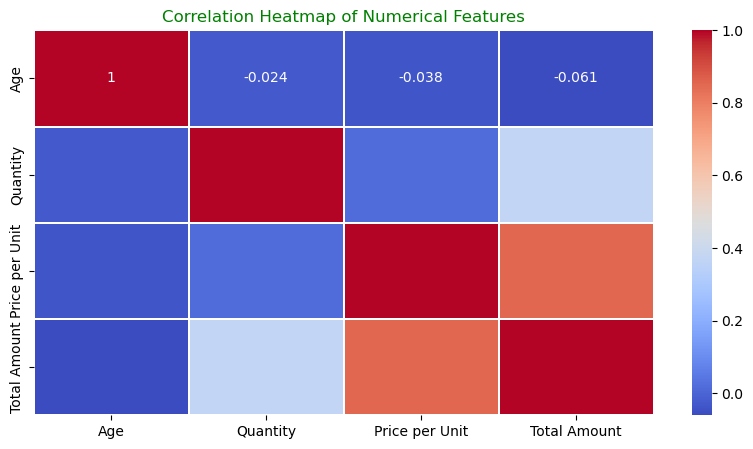

In [27]:
numerical_data = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

corr = numerical_data.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title("Correlation Heatmap of Numerical Features", color='green')
plt.show()